## Setup

In [49]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

GOLD_PATH = '/home/lucas-nunes/workspace/Postech/challenges/2_ibov/data/gold'

MIN_THRESHOLD_VALID = 0.70 # Value should be at least this value to be considered on the Model

LIST_COLUMNS_DF_FILTER = ['data', 'ultimo']

## Read

In [24]:
df = pd.read_parquet(f'{GOLD_PATH}/gold.parquet')
list_value_columns = df.columns.to_list()
list_value_columns.remove('data')

## Correlations

In [33]:
df_2k = df.where(df['data'] > datetime.date(2000, 1, 1)).dropna(how='all')

In [ ]:
correlation_matrix = df[list_value_columns].corr()
correlation_matrix_2k = df_2k[list_value_columns].corr()

print(correlation_matrix_2k)

                  ndx      us30      ouro   ibrx100    FTXIN9    ibrx50  \
ndx          1.000000  0.974685  0.758509  0.885950  0.511529  0.909378   
us30         0.974685  1.000000  0.780898  0.932700  0.556610  0.933690   
ouro         0.758509  0.780898  1.000000  0.894024  0.460636  0.859886   
ibrx100      0.885950  0.932700  0.894024  1.000000  0.655622  0.998398   
FTXIN9       0.511529  0.556610  0.460636  0.655622  1.000000  0.674846   
ibrx50       0.909378  0.933690  0.859886  0.998398  0.674846  1.000000   
spx          0.991182  0.992740  0.760894  0.904948  0.531361  0.916156   
bitcoin      0.920155  0.860659  0.805095  0.812945  0.622188  0.818145   
ibov         0.842993  0.887126  0.902964  0.990422  0.687748  0.994020   
ibov_futuro  0.219213  0.581640  0.859114  0.994597  0.650048  0.995636   
prata        0.443993  0.464526  0.883484  0.648809  0.247837  0.545169   
us500        0.991894  0.993509  0.759157  0.947085  0.474425  0.941234   
petroleo     0.193799  0.

In [53]:
list_index_within_threshold = [key for key, value in correlation_matrix['ibov'].to_dict().items() if value > MIN_THRESHOLD_VALID]

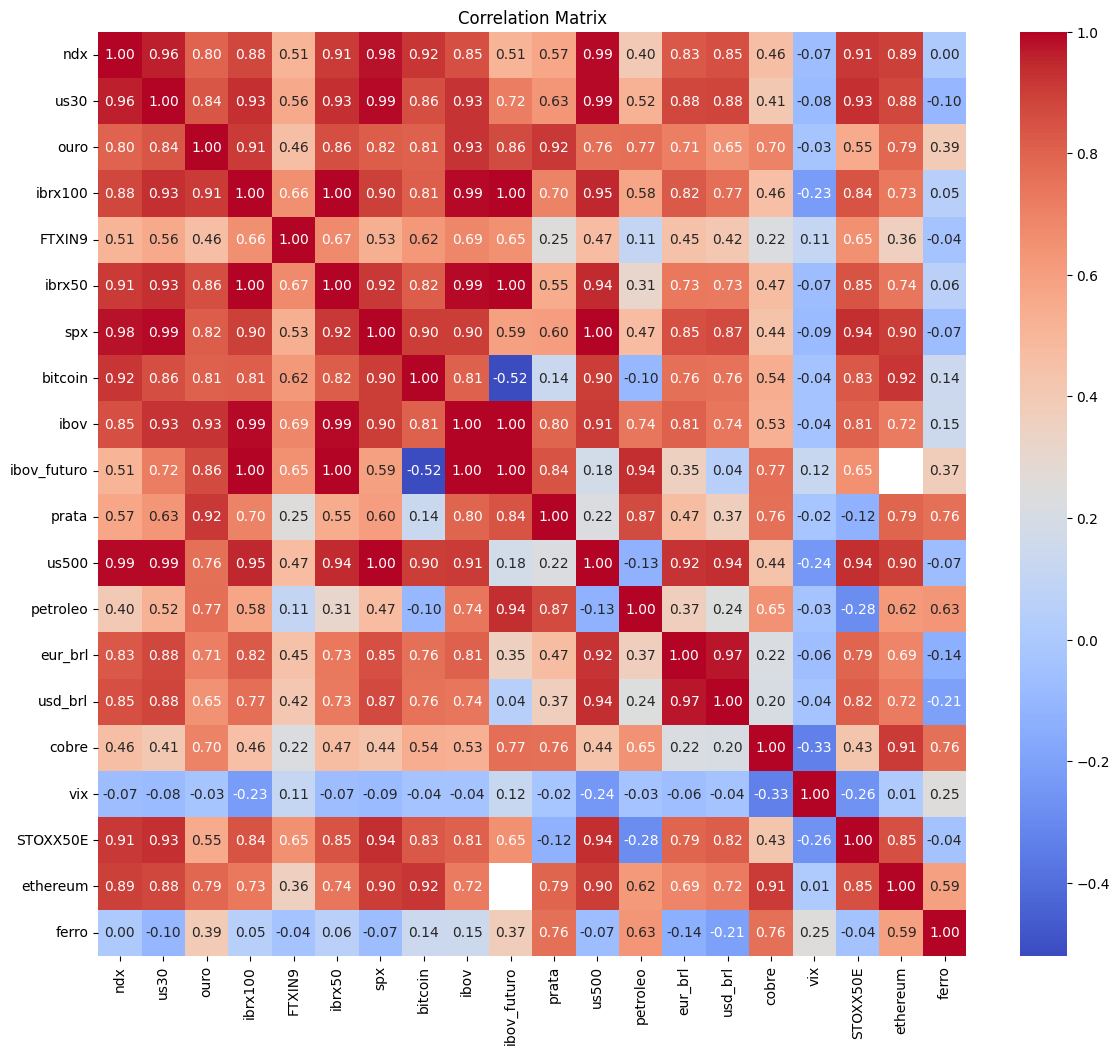

In [41]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

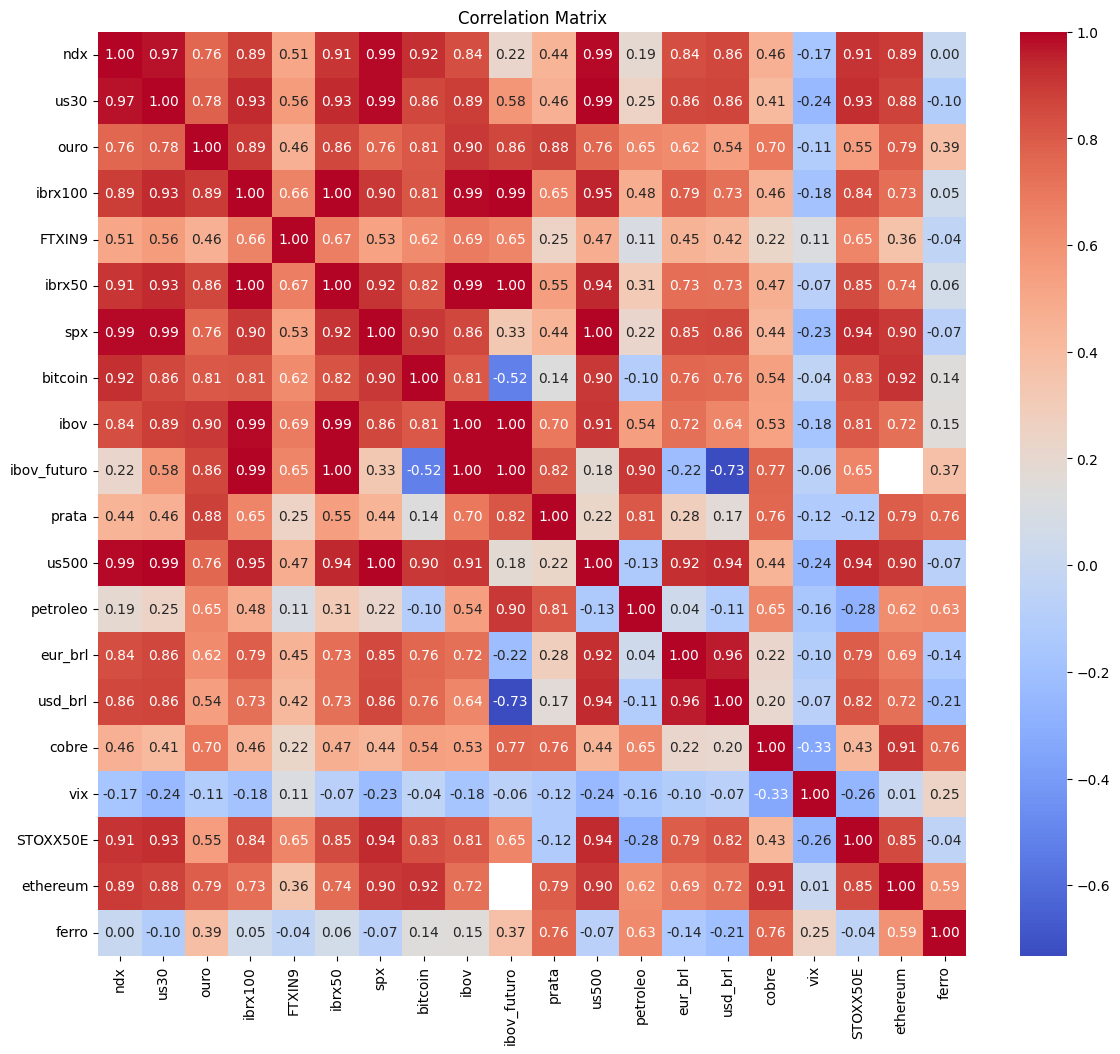

In [37]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_2k, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()